# บทที่ 2 - ชุดข้อมูลมหัศจรรย์และถิ่นที่อยู่

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ai-builders/curriculum/blob/main/notebooks/02_fantastic_datasets.ipynb)

ในปัจจุบันชุดข้อมูลที่มีพร้อมทั้งปริมาณและคุณภาพเป็นส่วนสำคัญในการสร้าง ML models ในบทเรียนนี้เราจะเรียนรู้วิธีการหาข้อมูลมาเทรนโมเดลของเราทั้งจากชุดข้อมูล open data, web scraping, หรือสร้างขึ้นมาเองจากโมเดลและโค้ด open source ทั้งนี้การหาข้อมูลมาเทรนโมเดลจากแหล่งข้อมูลสาธารณะที่กล่าวมานั้นเราต้องให้ความสำคัญเรื่องลิขสิทธิ์และจริยธรรม (แม้แต่โมเดลเองก็สร้างข้อมูลที่ผิดลิขสิทธิ์-จริยธรรมได้; เรียนเพิ่มเติมในบทที่ 7)

## ติดตั้ง Package ที่ต้องใช้งาน

In [1]:
#fastai
!pip install -q fastbook

# วิธีลง selenium บน colab จาก [Chalach Monkhontirapat](https://medium.com/equinox-blog/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89-selenium-%E0%B8%9A%E0%B8%99-google-colaboratory-984739ed44e5)
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

#ctgan
!pip install -q sdv
!pip install pandas==1.3.5 #ctgan เวิร์คกับ pandas เวอร์ชั่นนี้

#review generation
!pip install -q transformers

#machine translation
!pip install -q pythainlp[translate] sentencepiece sklearn-pycrfsuite

#reset runtime เพื่อให้แน่ใจว่า package ต่างๆใช้งานได้
exit()

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 38.8 MB/s 
     |████████████████████████████████| 188 kB 36.1 MB/s 
     |████████████████████████████████| 60 kB 3.2 MB/s 
     |████████████████████████████████| 968 kB 4.9 MB/s 
     |████████████████████████████████| 359 kB 14.3 MB/s 
     |████████████████████████████████| 138 kB 25.0 MB/s 
     |████████████████████████████████| 3.6 MB 24.1 MB/s 
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 58 kB 4.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 

In [3]:
import pandas as pd
pd.__version__

'1.3.5'

## Data-centric AI เมื่อปริมาณ-คุณภาพข้อมูลสำคัญเท่ากับหรือมากกว่าคุณภาพโมเดล

ในปัจจุบันเรามีสถาปัตยกรรมประสิทธิภาพสูงมากมายให้เลือกใช้ทำ ML models (images - ResNet/EfficientNet, texts - BERT family, tabular data - gradient boosted trees) ปริมาณและคุณภาพของชุดข้อมูลจึงเริ่มมีความสำคัญมากยิ่งขึ้นในการทำให้ประสิทธิภาพของโมเดลของเราดีขึ้น

แนวคิด Data-centric AI ถูกทำให้เป็นที่รู้จักโดย [Andrew Ng และ Landing AI](https://landing.ai/data-centric-ai/) กล่าวคือแทนที่เราจะพยามสร้างโมเดลที่มีประสิทธิภาพยิ่งขึ้น (และโดยส่วนใหญ่แล้วซับซ้อน ใหญ่ และใช้งานยากขึ้น)ให้เรามาใช้เวลาในการ 1) เพิ่มปริมาณข้อมูลและ 2) พัฒนาคุณภาพข้อมูลแทน

ยกตัวอย่าง Data-centric AI ในการตัดคำภาษาไทยด้วยโมเดลโดย [@kornwtp](https://medium.com/@kornwtp/) ในบทความ [Data-Centric ML for Thai Word Segmentation](https://medium.com/@kornwtp/data-centric-for-thai-word-segmentation-e31a79db650d) พวกเขาทำการทดลองตัดคำภาษาไทยด้วยชุดข้อมูล [VISTEC-TP-TH-2021](https://github.com/mrpeerat/OSKut/tree/main/VISTEC-TP-TH-2021) (ประมาณ 5 หมื่นประโยค) ด้วยโมเดล [deepcut](https://github.com/rkcosmos/deepcut) อย่างที่เห็นในตารางรายงานผล การเพิ่มขนาดโมเดลถึง 1 เท่าตัวมีผลให้ความแม่นยำเพิ่มขึ้นเพียงแค่ 1.37% กลับกันการเพิ่มข้อมูลเพียงแค่ 1,500 ตัวอย่างทำให้ความแม่นยำเพิ่มขึ้นถึง 4.90% ยิ่งถ้าข้อมูลที่เพิ่มถูกทำความสะอาดแล้วจะทำให้เพิ่มขึ้นถึง 7.48% (แน่นอนว่าถ้ายิ่งโมเดลใหญ่และข้อมูลเยอะก็ยิ่งดี)

<img src=https://miro.medium.com/max/1400/0*J2vA5iRnIMfuDDAc width="500px">

## ชุดข้อมูลสาธารณะ - Open Data and Open Source

ชุดข้อมูล open data และโค้ด open source ถือเป็นสาธารณูปโภคขั้นพื้นฐานของการทำ ML และโชคดีที่น่าจะเป็นสาธารณูปโภคขั้นพื้นฐานไม่กี่อย่างที่เราในฐานะบุคคลสามารถช่วยกันสร้างได้ด้วยการนำไปใช้-เผยแพร่ชุดข้อมูลและโค้ด

โดยทั่วไปแล้ว ชุดข้อมูลจะถูกเผยแพร่ภายใต้ [Creative Commons Licenses](https://creativecommons.org/) ที่นิยมดังต่อไปนี้

* `CC` - Creative Commons
* `BY` (Attribution) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ต้องอ้างอิงเจ้าของผลงาน
* `SA` (ShareAlike) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ต้องคง License เดิมไว้
* `NC` (NonCommercial) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ห้ามใช้เพื่อการค้า
* `ND` (NoDerivatives) - ใช้ทำซ้ำ แจกจ่ายได้ แต่ห้ามดัดแปลง

เราแนะนำให้คุณแบ่งปันผลงานเป็น `CC-BY-SA` เพื่อให้ชุมชนนักพัฒนาสามารถนำไปต่อยอดได้ เหมือนเช่นที่เรานำงานของชุมชนมาต่อยอด

คุณสามารถเลือก License ที่คุณต้องการได้[ที่นี่](https://creativecommons.org/choose/)

### แหล่งค้นหาชุดข้อมูล

ต่อไปนี้คือแหล่งข้อมูลหลักๆที่คุณสามารถพบเจอชุดข้อมูล open data

แหล่งค้นหาชุดข้อมูลทั่วไป
* [Kaggle](https://www.kaggle.com/datasets)
* [Google Dataset Search](https://datasetsearch.research.google.com/)
* [Papers with Code](https://paperswithcode.com/datasets)
* [Tensorflow Datasets](https://www.tensorflow.org/datasets)

แหล่งค้นหาชุดข้อมูล Images
* [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)
* [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html)

แหล่งค้นหาชุดข้อมูล NLP และ Speech
* [Hugging Face Datasets](https://huggingface.co/datasets)
* [torchtext.datasets](https://pytorch.org/text/stable/datasets.html)
* [torchaudio.datasets](https://pytorch.org/audio/stable/datasets.html)
* [NLP for Thai](https://nlpforthai.com/)


แหล่งค้นหาชุดข้อมูล Tabular Data
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

### ชื่อ Task ไว้ใช้ค้นหาชุดข้อมูล

อีกแนวทางการค้นหาข้อมูลคือค้นหา "[ชื่อ task] datasets" ใน search engine

Images
* Image classification; จำแนกรูปภาพ
* Object detection; จับวัตถุในรูปภาพ
* Image segmentation; จำแนก pixel ในรูปภาพ
* Image information retrieval (search); ค้นหารูปภาพด้วยรูปภาพ
* Image captioning; ใส่คำบรรยายให้รูปภาพ
* Visual question answering; ตอบคำถามจากรูปภาพ
* Image generation; สร้างรูปภาพ
* Image reconstruction; ซ่อมแซมรูปภาพ (รูปเก่า, เซนเซอร์ ฯลฯ)
* Style transfer; เปลี่ยนสไตล์ของรูปภาพ

NLP
* Sequence classification; จำแนกข้อความ
* Token classification; จำแนกหน่วยคำในข้อความ
* Extractive question answering; ตอบคำถามจากบทความ
* Machine translation; แปลภาษา
* Summarization; ย่อความ
* Paraphrasing; ถอดความ
* Optical character recognition; เปลี่ยนตัวอักษรในภาพเป็นข้อความ
* Text information retrieval (search); ค้นหาข้อความด้วยข้อความ
* Text generation; สร้างข้อความ
* Dialogue; สร้างบทสนทนาตอบโต้

Speech
* Speech classification; จำแนกเสียง
* Automatic speech recognition; ถอดเสียงเป็นข้อความ
* Speech synthesis; สร้างเสียง (จากข้อความ)
* Speaker recognition; จำแนกผู้พูด

Tabular Data
* Multi-class classification; จำแนกตัวอย่าง (1 ตัวอย่าง = 1 ประเภท)
* Multi-label classification; จำแนกตัวอย่าง (1 ตัวอย่าง = มากกว่า 1 ประเภท)
* Regression; ทำนายจำนวนจริง
* Time series forecasting; ทำนายตัวเลขในเชิงเวลา
* Recommendation; แนะนำสิ่งของ

## หารูปภาพจาก DuckDuckGo Image Search API

เทคนิคแนะนำโดย [fastai v4 part1 lesson 2](https://github.com/fastai/fastbook/blob/master/02_production.ipynb) ผู้ที่สนใจสามารถไปติดตามบทเรียนต้นทางได้ที่ [course.fast.ai](https://course.fast.ai/) สามารถใช้ search engine อื่นๆ เช่น Google, Bing เป็นต้น เราเลือกใช้ DuckDuckGo เนื่องจากความสะดวกที่สามารถส่งคำขอค้นหารูปภาพได้โดยไม่ต้องใช้ API key

In [1]:
from fastbook import *
from fastai.vision.widgets import *
from tqdm.auto import tqdm

#download from duckduckgo
def search_images_ddg(key, max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

In [2]:
#save ไว้ที่ไหน
path = Path('images')
#เอารูปอะไรบ้าง (labels)
labels = ['chocolate chip cookies','raisin cookies']
#เอา label ละกี่รูป
MAX_N = 100

if not path.exists():
    path.mkdir()
    for l in tqdm(labels):
        dest = (path/l)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(l, max_n=MAX_N)
        download_images(dest, urls=results)

In [3]:
#เช็คว่าได้รูปอะไรบ้าง
fns = get_image_files(path)
fns

(#196) [Path('images/raisin cookies/00000056.jpg'),Path('images/raisin cookies/00000011.jpg'),Path('images/raisin cookies/00000083.jpg'),Path('images/raisin cookies/00000053.jpg'),Path('images/raisin cookies/00000014.jpg'),Path('images/raisin cookies/00000006.jpg'),Path('images/raisin cookies/00000096.jpg'),Path('images/raisin cookies/00000024.JPG'),Path('images/raisin cookies/00000087.jpg'),Path('images/raisin cookies/00000089.jpg')...]

In [4]:
#ดูว่าหารูปไหนไม่เจอบ้าง
failed = verify_images(fns)
failed

(#0) []

In [5]:
#นำรูปที่หาไม่เจอออก
failed.map(Path.unlink)

(#0) []

## Web Scraping ดึงข้อมูลจากเว็บไซต์สาธารณะ

Web Scraping คือการเขียนโปรแกรมดึงข้อมูลจากเว็บไซต์สาธารณะ ข้อควรระวังคือแม้โดยความเป็นจริงแล้วข้อมูลเหล่านั้นจะถูกเปิดเผยให้ใครเข้าไปดูก็ได้ แต่ไม่ได้หมายความว่าเจ้าของเว็บไซต์จะอยากให้เราดึงข้อมูลจำนวนมากจากเว็บไซต์ของพวกเขา ไม่ว่าจะด้วยเหตุผลด้านลิขสิทธิ์การใช้งานหรือการเพิ่มภาระให้เซิร์ฟเวอร์ของเว็บไซต์นั้นๆ ยกตัวอย่างเช่น Facebook หรือ Twitter ที่ข้อตกลงการใช้งานของพวกเขาไม่อนุญาตให้เราดึงข้อมูลด้วย Web Scraping แต่อนุญาตให้ดึงข้อมูลผ่าน API อย่างเป็นทางการแทน 

หากไม่แน่ใจในนโยบายการใช้งาน ทางที่ดีควรติดต่อขออนุญาตจากเจ้าของเว็บไซต์ก่อน นี่คือตัวอย่างที่ทางทีมงานติดต่อไปยัง [soccersuck.com](https://www.soccersuck.com) เพื่อขออนุญาตนำมาใช้สอน

> ทีมงาน AI Builders: สวัสดีครับ ผมทำโครงการสอนเด็กมัธยมทำ AI ชื่อ AI Builders (https://www.facebook.com/aibuildersx) อยู่ครับ พอดีครั้งนี้เราจะจัดสอนช่วงหลังสงกรานต์ และมีหัวข้อหนึ่งคือ web scraping หรือการเขียนโปรแกรมดึงเนื้อหาจากเว็บไซต์ อยากขออนุญาตใช้ https://www.soccersuck.com/boards/oldnews เป็นตัวอย่างในการฝึกสอนครับ โดนสอนให้น้องๆเขียนโปรแกรมดึงพาดหัวข่าว, url ข่าว, และเนื้อข่าวเฉพาะกระทู้ที่อยู่ใน old news 3 หน้าเท่านั้น โปรแกรมทั้งหมดใช้เพื่อสาธิตในการศึกษาครับ นักเรียนมีจำนวน 50 คน คิดว่าไม่มีปัญหา traffic แม้จะกดรันโค้ดพร้อมกันทุกคนครับ

> Soccersuck: ได้ครับไม่มีปัญหา



### Static Web

สมมุติว่าเราอยากทำโมเดล "เขียนพาดหัวข่าวฟุตบอลจากเนื้อข่าวในเว็บ [soccersuck.com](https://www.soccersuck.com/boards/oldnews)"

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### ดึง HTML มาเปลี่ยนเป็น Soup

In [7]:
#package สำหรับจัดการ html เรียกว่า BeautifulSoup
def get_soup(url):
    with requests.get(url) as r:
        soup = BeautifulSoup(r.text, features='html.parser')
    return soup

In [8]:
#ดึงข้อมูล html จากเว็บไซต์มาเปลี่ยนเป็น soup
url = f'https://www.soccersuck.com/boards/oldnews/1/'
soup = get_soup(url)
soup

﻿<!DOCTYPE HTML>

<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <title>
		#### ได้รู้ความจริง ได้ยิ่งกว่าฟุตบอล อ่าน soccersuck.com####	</title>
<link href="/img/web/ss_logo_f_16.ico" rel="shortcut icon"/>
<meta content="app-id=1042191005" name="apple-itunes-app"/>
<meta content="app-id=com.soccersuck.devtab.com.soccersuck" name="google-play-app"/>
<link href="https://www.soccersuck.com/css/jquery.smartbanner.css" media="screen" rel="stylesheet" type="text/css"/>
<meta content="ข่าวฟุตบอล ข่าวบอล นักฟุตบอล ผลการแข่งขัน ข่าวลือ ข่าวการย้ายทีม บอลอังกฤษ บอลเยอรมัน บอลอิตาลี บอลสเปน ฟุตบอล บอบทีมชาติ บอลไทย บอลทีมชติไทย เว็บบอร์ด วาไรตี้ ภาพเซ็กซี่ 18+ โปรแกรมการแข่งขัน โปรแกรมถ่ายทอดสด" name="description">
<meta content="ข่าวฟุตบอล,ข่าวบอล,ผลการแข่งขัน,นักฟุตบอล,บอลอังกฤษ,บอลเยอรมัน,บอลอิตาลี,บอลสเปน,ฟุตบอล,ข่าวการย้ายทีม,

#### หา Tag ต่างๆใน Soup

In [9]:
#หา tag ชื่อ div ที่มี class oldnew_p_tr
#เราสามาร?ถหาโดย id ได้ด้วย แค่เปลี่ยนเป็น id='id_you_are_looking_for'
soup.find('div', class_='oldnew_p_tr')

<div class="oldnew_p_tr" style="background: #C4E29B;">
<img alt="" src="https://www.soccersuck.com/images/eng.gif" style="margin: 0px 5px -1px 2px;width: 20px;"/> <a href="https://www.soccersuck.com/boards/topic/2141328" target="_blank">
                    สื่อตี 'ทุนโบห์ลี่' มั่นใจเทคโอเวอร์สิงห์สำเร็จ                    </a>
</div>

In [10]:
soup.find('div', class_='oldnew_p_tr').find('a')

<a href="https://www.soccersuck.com/boards/topic/2141328" target="_blank">
                    สื่อตี 'ทุนโบห์ลี่' มั่นใจเทคโอเวอร์สิงห์สำเร็จ                    </a>

In [11]:
#เอา text จาก tag <a>
soup.find('div', class_='oldnew_p_tr').find('a').text.strip(),\
#เอา href จาก tag <a>
soup.find('div', class_='oldnew_p_tr').find('a').get('href')

'https://www.soccersuck.com/boards/topic/2141328'

In [12]:
df = pd.DataFrame([
{'headline_abridged': i.text.strip(),
 'url': i.find('a').get('href')} \
 #find() จะหาแค่ tag แรกที่เจอ แต่ find_all() จะหาทุก tag ที่ตรงเงื่อนไข
 for i in soup.find_all('div', class_='oldnew_p_tr')]).head(10)
df

,headline_abridged,url
0,สื่อตี 'ทุนโบห์ลี่' มั่นใจเทคโอเวอร์สิงห์สำเร็จ,https://www.soccersuck.com/boards/topic/2141328
1,JK ยอมรับคงคิดถึง 'เมอร์ซี่ไซค์ดาร์บี้' ถ้าทอฟฟี่ต...,https://www.soccersuck.com/boards/topic/2141323
2,'เสี่ยหมู' ปัดโอกาสกลับผีร่วมงาน 'เทน ฮาก...,https://www.soccersuck.com/boards/topic/2141320
3,ทุกคะแนนมีค่า! 'แลมพ์' บอกท๊อฟฟี่เยือนหงส์แต้มเดีย...,https://www.soccersuck.com/boards/topic/2141316
4,"ต้านไม่ไหว! ""เชียงราย"" ยังไร้แต้มโดน ""วิสเซล ...",https://www.soccersuck.com/boards/topic/2141315
5,เผยผีเตรียมดร็อป 'แมกไกวร์' เยือนปืน,https://www.soccersuck.com/boards/topic/2141309
6,"วันออสการ์กีฬาไทย! ""มาดามแป้ง"" ขึ้นรับทีมยอดเยี่ยม...",https://www.soccersuck.com/boards/topic/2141308
7,'ทูเคิ่ล' รับฟอร์มเกมเหย้าสิงห์น่ากังวล,https://www.soccersuck.com/boards/topic/2141304
8,วิจารณ์ได้วิจารณ์ไป! JK ไม่เคยกังขา 'ธิอาโก้' ไม่เ...,https://www.soccersuck.com/boards/topic/2141290
9,'โทมิยาสุ' มีลุ้นคุมแบ็คช่วย 'ปืน' บูีผี,https://www.soccersuck.com/boards/topic/2141278


#### ดึงข้อมูลจาก url ย่อย

In [13]:
#จากหน้า list　ข่าว พาดหัวจะแสดงได้ไม่เต็ม
df.loc[0]

headline_abridged    สื่อตี 'ทุนโบห์ลี่' มั่นใจเทคโอเวอร์สิงห์สำเร็จ
url                  https://www.soccersuck.com/boards/topic/2141328
Name: 0, dtype: object

In [14]:
#เราสามารถเข้าไปใน url ของข่าวแต่ละข่าวเพื่อไปเอาพาดหัวแบบเต็มและเนื้อข่าวได้
soup = get_soup(df.loc[0,'url'])
soup.find('div', class_='post_head').text.strip(),\
soup.find('div', class_='post_desc').text.strip()

("สื่อตี 'ทุนโบห์ลี่' มั่นใจเทคโอเวอร์สิงห์สำเร็จ",
 'รายงานเปิดเผยว่ากลุ่มทุนของ ท็อดด์ โบห์ลี่ มั่นใจยิ่งขึ้นว่าจะเป็นฝ่ายที่เข้าเส้นชัยเทคโอเวอร์ เชลซี สำเร็จ\n\nตอนนี้พ้นเส้นตายการยื่นข้อเสนอสุดท้ายสำหรับการซื้อ เชลซี ไปแล้ว จึงเหลือเวลาอีกไม่มากก่อนว่าที่เจ้าของใหม่ถูกส่งไปให้รัฐบาลผู้ดีและพรีเมียร์ลีกพิจารณาความเหมาะสม\n\nBlick สื่อจากสวิตเซอร์แลนด์ก็รายงานว่า โบห์ลี่ รวมถึง ฮานส์ยอร์ก วีสส์ เศรษฐีร่วมทุนต่างมั่นใจยิ่งขึ้นว่าพวกเขาจะเข้าเทคโอเวอร์ "สิงห์บลูส์" สำเร็จ\n\nพวกเขาเปิดเผยถึงความตั้งใจที่จะซื้อ เชลซี ตั้งแต่เดือนที่แล้วหลัง โรมัน อับราโมวิช ประกาศขายสโมสรในวันที่ 2 มีนาคม\n\nจอร์จ ออสบอร์น อดีตรัฐมนตรีกระทรวงการคลังก็ช่วยเหลือกลุ่มทุนของ โบห์ลี่ หลังพวกเขารับคำแนะนำจากบริษัท Robey Warshaw ที่ ออสบอร์น ร่วมงานในปีที่แล้ว\n\nโบห์ลี่ ถูกมองเป็นตัวเต็งที่จะได้เทคโอเวอร์ เชลซี โดยเขาเป็นเจ้าของบริษัทลงทุน Eldridge อีกทั้งยังเป็นเจ้าของร่วม แอลเอ ด็อดเจอร์ส ทีมเบสบอลในอเมริกา\n\nโบห์ลี่ เคยยื่นข้อเสนอ 2.2 พันล้านปอนด์เพื่อขอซื้อ เชลซี ในปี 2019 แต่โดนปฏิเสธและเขาก็ตั้งใจที่จ

In [15]:
#เขียนฟังชั่นเพื่อเข้าไปดึงข้อมูลจากหน้าข่าว
def get_post_head_desc(url):
    soup = get_soup(url)
    return {'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()}

In [16]:
#วนลูป (map) เพื่อไปดึงพาดหัวแบบเต็มและเนื้อข่าว
df2 = pd.DataFrame(df.url.map(get_post_head_desc).tolist())
df = pd.concat([df,df2],1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,headline_abridged,url,post_head,post_desc
0,สื่อตี 'ทุนโบห์ลี่' มั่นใจเทคโอเวอร์สิงห์สำเร็จ,https://www.soccersuck.com/boards/topic/2141328,สื่อตี 'ทุนโบห์ลี่' มั่นใจเทคโอเวอร์สิงห์สำเร็จ,"รายงานเปิดเผยว่ากลุ่มทุนของ ท็อดด์ โบห์ลี่ มั่นใจยิ่งขึ้นว่าจะเป็นฝ่ายที่เข้าเส้นชัยเทคโอเวอร์ เชลซี สำเร็จ\n\nตอนนี้พ้นเส้นตายการยื่นข้อเสนอสุดท้ายสำหรับการซื้อ เชลซี ไปแล้ว จึงเหลือเวลาอีกไม่มากก่อนว่าที่เจ้าของใหม่ถูกส่งไปให้รัฐบาลผู้ดีและพรีเมียร์ลีกพิจารณาความเหมาะสม\n\nBlick สื่อจากสวิตเซอร์แลนด์ก็รายงานว่า โบห์ลี่ รวมถึง ฮานส์ยอร์ก วีสส์ เศรษฐีร่วมทุนต่างมั่นใจยิ่งขึ้นว่าพวกเขาจะเข้าเทคโอเวอร์ ""สิงห์บลูส์"" สำเร็จ\n\nพวกเขาเปิดเผยถึงความตั้งใจที่จะซื้อ เชลซี ตั้งแต่เดือนที่แล้วหลัง โรมัน อับราโมวิช ประกาศขายสโมสรในวันที่ 2 มีนาคม\n\nจอร์จ ออสบอร์น อดีตรัฐมนตรีกระทรวงการคลังก็ช่วยเหลื..."
1,JK ยอมรับคงคิดถึง 'เมอร์ซี่ไซค์ดาร์บี้' ถ้าทอฟฟี่ต...,https://www.soccersuck.com/boards/topic/2141323,JK ยอมรับคงคิดถึง 'เมอร์ซี่ไซค์ดาร์บี้' ถ้าทอฟฟี่ตกชั้น,"เยอร์เก้น คลอปป์ ผู้จัดการทีมลิเวอร์พูล ยอมรับว่า คงคิดถึงเมอร์ซี่ย์ไซด์ดาร์บี้แมตช์ถ้าหากเอฟเวอร์ตัน ต้องตกชั้นจากพรีเมียร์ลีกขึ้นมาจริงๆ \n\n\nทัพหงส์แดง มีโปรแกรมนัดสำคัญพบเอฟเวอร์ตัน ในเมอร์ซี่ย์ไซด์ดาร์บี้ ที่แอนฟิลด์ วันอาทิตย์นี้ ซึ่งทีมของคลอปป์ กำลังสู้เพื่อตำแหน่งแชมป์ ขณะที่ทีมทอฟฟี่ต้องสู้เพื่อหนีจากการถูกลดชั้น\n\nเมื่อถูกถามว่า คลอปป์ จะคิดถึงเมอร์ซี่ย์ไซด์ดาร์บี้หรือไม่ บอสใหญ่ทีมหงส์แดง ตอบว่า\n\n""แน่นอน ผมคิดว่าเราทุกคนเคยชินกับมัน"" คลอปป์ กล่าวก่อนเกม\n\n""พบกับยูไนเต็ดเมื่อคืนก่อนให้อารมณ์ที่แตกต่างไปอีกแบบ โดยปกติจะมีเวลาเต็มทั้งสัปดาห์ก่อนเจอเอฟเวอร์ตัน มันทำให้เรามีเวล..."
2,'เสี่ยหมู' ปัดโอกาสกลับผีร่วมงาน 'เทน ฮาก...,https://www.soccersuck.com/boards/topic/2141320,'เสี่ยหมู' ปัดโอกาสกลับผีร่วมงาน 'เทน ฮาก',"มีรายงานว่า เวย์น รูนี่ย์ ได้รับการเสนอโอกาสให้กลับสู่ แมนเชสเตอร์ ยูไนเต็ด เพื่อเป็นส่วนหนึ่งของทีมสตาฟฟ์โค้ช เอริค เทน ฮาก แต่เลือกที่จะตอบปฏิเสธ\n\nอดีตกองหน้าที่ผ่านการซัดไปมากกว่า 250 ประตูในการเล่นให้ แมนฯ ยูไนเต็ด นั้นสร้างความประทับใจระหว่างคุม ดาร์บี้ เคาน์ตี้ ในเดอะ แชมเปี้ยนชิพ\n\nแม้จะโดนตัดแต้มไป 21 คะแนนแต่ รูนี่ย์ ก็ช่วยให้ ดาร์บี้ เก็บชัยชนะไปได้ 13 นัดจากการลงสนามไปแล้ว 43 เกมในซีซั่นนี้ ซึ่งรวมถึงการปราบทีมอย่าง ฟูแล่ม, เชฟฟิลด์ ยูไนเต็ด และ เวสต์บรอมวิช อัลเบี้ยน\n\nอย่างไรก็ตามแม้จะทำดีแค่ไหนแต่แต้มที่โดนตัดก็มหาศาลเกิน ทำให้ ""แกะเขาเหล็ก"" ร่วงตกชั้นสู่ลีกวันเป็นที่เรีย..."
3,ทุกคะแนนมีค่า! 'แลมพ์' บอกท๊อฟฟี่เยือนหงส์แต้มเดีย...,https://www.soccersuck.com/boards/topic/2141316,ทุกคะแนนมีค่า! 'แลมพ์' บอกท๊อฟฟี่เยือนหงส์แต้มเดียวก็เอา,"แฟรงค์ แลมพาร์ด กุนซือ เอฟเวอร์ตัน บอกว่าเขายินดีรับผลเสมอในเกมเมอร์ซี่ย์ไซด์ดาร์บี้ที่จะบุกไปเยือน ลิเวอร์พูล คืนวันอาทิตย์\n\n""ท๊อฟฟี่สีน้ำเงิน"" เก็บคะแนนกับการเล่นทีมเยือนในฤดูกาลนี้ไปได้เพียง 6 แต้มเท่านั้น โดยชัยชนะเกมเยือนหนสุดท้ายเกิดขึ้นในเดือนสิงหาคม \n\nกลับกัน ลิเวอร์พูล คู่ปรับร่วมเมืองทำแต้มหล่นไป 6 คะแนนเท่านั้น (เสมอ 3 นัด) จากการลงเล่นเกมเหย้าในลีกฤดูกาลนี้\n\nเอฟเวอร์ตัน เองยังวนเวียนท้ายตารางดิ้นรนหนีตกชั้นต่อไปและอาจจะร่วงลงไปอยู่ในโซนตกชั้นก่อนที่เกมจะคิกออฟในคืนวันอาทิตย์\n\nเมื่อถูกถามว่าการได้แต้มเดียวจะทำให้เขาพอใจหรือไม่, แลมพาร์ด ตอบว่า ""คุณคิดยังไงล่ะ? แน่นอน เรา..."
4,"ต้านไม่ไหว! ""เชียงราย"" ยังไร้แต้มโดน ""วิสเซล ...",https://www.soccersuck.com/boards/topic/2141315,"ต้านไม่ไหว! ""เชียงราย"" ยังไร้แต้มโดน ""วิสเซล โกเบ"" กระทุ้งยับ 6-0","""กว่างโซ้ง"" เชียงราย ยูไนเต็ด สู้ไม่ไหวพ่ายให้กับ วิสเซล โกเบ ทีมดังจากเจลีก ญี่ปุ่น ไปด้วยสกอร์ขาดลอย 6-0 ศึกเอเอฟซี แชมเปี้ยนส์ ลีก 2022\n\nฟุตบอลเอเอฟซี แชมเปี้ยนส์ ลีก 2022 กลุ่มเจ นัดสอง\nวันศุกร์ที่ 22 เมษายน 2565 \nสนาม : บุรีรัมย์ ซิตี้ สเตเดี้ยม (เขากระโดง)\n\nวิสเซล โกเบ 6-0 เชียงราย ยูไนเต็ด\n\nผู้ทำประตู : 1-0 ยูยะ โอซาโกะ น.6,2-0 โคยะ ยูรุกิ น.16,3-0 ยูตะ โกเกะ น.32,4-0 โคยะ ยูรุกิ น.38,5-0 ลินคอล์น น.58,6-0 เรโอะ โอซากิ น.76\n\nการแข่งขันฟุตบอลเอเอฟซี แชมเปี้ยนส์ลีก 2022 รอบแบ่งกลุ่ม โซนตะวันออก กลุ่ม เจ ระหว่าง ""กว่างโซ้งมหาภัย"" เชียงราย ยูไนเต็ด ของกุนซือเอเมอร์สัน เปเรย์ร..."
5,เผยผีเตรียมดร็อป 'แมกไกวร์' เยือนปืน,https://www.soccersuck.com/boards/topic/2141309,เผยผีเตรียมดร็อป 'แมกไกวร์' เยือนปืน,"รายงานจาก The Athletic เปิด

### Static Web แบบเร็วด้วย Concurrency

บางครั้งแค่ scape ทีละ url อาจจะไม่ทันใจ เราจึงสามารถ scrape ทีละหลายๆ url "พร้อมๆ" กันได้ด้วย concurrency วิธีมีหลากหลาย แต่เราเลือกใช้วิธีที่แนะนำโดย [Nick Becker, RAPIDS Team at NVIDIA](https://beckernick.github.io/faster-web-scraping-python/)

In [17]:
import concurrent.futures

In [18]:
#url ข่าวที่เราต้องการ scrape
urls = df.url.tolist()
urls[:3]

['https://www.soccersuck.com/boards/topic/2141328',
 'https://www.soccersuck.com/boards/topic/2141323',
 'https://www.soccersuck.com/boards/topic/2141320']

In [19]:
#ฟังชั่นเพื่อเข้าไปดึงข้อมูลจากหน้าข่าวอันเดิม 
#เพิ่มเติมคือเราจะบอกให้มันเก็บข้อมูลที่ถูก scrape ไว้ใน list ชื่อ res
def get_post_head_desc_append(url, res):
    soup = get_soup(url)
    res.append({'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()})

In [20]:
#เราใช้ 20 threads คือให้ดึงเต็มที่ 20 url　พร้อมๆกัน
MAX_THREADS = 20

def scrape_multithread(urls, scrape_func):
    threads = min(MAX_THREADS, len(urls))    
    with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
        executor.map(scrape_func, urls)

In [21]:
#ทำการ scrape แบบ concurrent
from functools import partial

res = []
scrape_multithread(urls, partial(get_post_head_desc_append, res=res))
pd.DataFrame(res)

,post_head,post_desc
0,"ต้านไม่ไหว! ""เชียงราย"" ยังไร้แต้มโดน ""วิสเซล โกเบ"" กระทุ้งยับ 6-0","""กว่างโซ้ง"" เชียงราย ยูไนเต็ด สู้ไม่ไหวพ่ายให้กับ วิสเซล โกเบ ทีมดังจากเจลีก ญี่ปุ่น ไปด้วยสกอร์ขาดลอย 6-0 ศึกเอเอฟซี แชมเปี้ยนส์ ลีก 2022\n\nฟุตบอลเอเอฟซี แชมเปี้ยนส์ ลีก 2022 กลุ่มเจ นัดสอง\nวันศุกร์ที่ 22 เมษายน 2565 \nสนาม : บุรีรัมย์ ซิตี้ สเตเดี้ยม (เขากระโดง)\n\nวิสเซล โกเบ 6-0 เชียงราย ยูไนเต็ด\n\nผู้ทำประตู : 1-0 ยูยะ โอซาโกะ น.6,2-0 โคยะ ยูรุกิ น.16,3-0 ยูตะ โกเกะ น.32,4-0 โคยะ ยูรุกิ น.38,5-0 ลินคอล์น น.58,6-0 เรโอะ โอซากิ น.76\n\nการแข่งขันฟุตบอลเอเอฟซี แชมเปี้ยนส์ลีก 2022 รอบแบ่งกลุ่ม โซนตะวันออก กลุ่ม เจ ระหว่าง ""กว่างโซ้งมหาภัย"" เชียงราย ยูไนเต็ด ของกุนซือเอเมอร์สัน เปเรย์ร..."
1,สื่อตี 'ทุนโบห์ลี่' มั่นใจเทคโอเวอร์สิงห์สำเร็จ,"รายงานเปิดเผยว่ากลุ่มทุนของ ท็อดด์ โบห์ลี่ มั่นใจยิ่งขึ้นว่าจะเป็นฝ่ายที่เข้าเส้นชัยเทคโอเวอร์ เชลซี สำเร็จ\n\nตอนนี้พ้นเส้นตายการยื่นข้อเสนอสุดท้ายสำหรับการซื้อ เชลซี ไปแล้ว จึงเหลือเวลาอีกไม่มากก่อนว่าที่เจ้าของใหม่ถูกส่งไปให้รัฐบาลผู้ดีและพรีเมียร์ลีกพิจารณาความเหมาะสม\n\nBlick สื่อจากสวิตเซอร์แลนด์ก็รายงานว่า โบห์ลี่ รวมถึง ฮานส์ยอร์ก วีสส์ เศรษฐีร่วมทุนต่างมั่นใจยิ่งขึ้นว่าพวกเขาจะเข้าเทคโอเวอร์ ""สิงห์บลูส์"" สำเร็จ\n\nพวกเขาเปิดเผยถึงความตั้งใจที่จะซื้อ เชลซี ตั้งแต่เดือนที่แล้วหลัง โรมัน อับราโมวิช ประกาศขายสโมสรในวันที่ 2 มีนาคม\n\nจอร์จ ออสบอร์น อดีตรัฐมนตรีกระทรวงการคลังก็ช่วยเหลื..."
2,"วันออสการ์กีฬาไทย! ""มาดามแป้ง"" ขึ้นรับทีมยอดเยี่ยม, ""เจ"" ซิวอาชีพชาย","""มาดามแป้ง"" นวลพรรณ ล่ำซำ ในฐานะผู้จัดการทีมขึ้นรับรางวัลชนิดกีฬาทีมยอดเยี่ยม (Sport) ทีมฟุตบอลทีมชาติไทย ชุดแชมป์ฟุตบอลชิงแชมป์อาเซียน “เอเอฟเอฟ ซูซูกิคัพ 2020” ขณะที่ “เจ” ชนาธิป สรงกระสินธ์ คว้ารางวัลนักกีฬาอาชีพชายยอดเยี่ยม \n\n“ส.ผู้สื่อข่าวกีฬา” จัดงานวันนักกีฬายอดเยี่ยม ประกาศผล “ออสการ์กีฬาไทย” ประจำปี 2564 “น้องเทนนิส-เจ้าสด” ผงาดคว้านักกีฬายอดเยี่ยมหญิงและชาย ขณะที่ “เมสซี่เจ-โปรเหมียว” ครองรางวัลนักกีฬาอาชีพชายและหญิงยอดเยี่ยม “ทัพช้างศึก” คว้าชนิดกีฬาทีมยอดเยี่ยม ด้าน “บาส-ปอป้อ” แรงเกินห้ามใจเบิ้ลรางวัลใหญ่ เช่นเดียวกับ “โค้ชเช” ที่ได้รางวัลโค้ชยอดเยี่ยม ส่วน “เฟอรารี่ แฟร์เท็..."
3,'โทมิยาสุ' มีลุ้นคุมแบ็คช่วย 'ปืน' บูีผี,"ทาเคฮิโระ โทมิยาสุ อาจคัมแบ็คกลับมาลงสนามให้ อาร์เซน่อล ในการเจอกับ แมนเชสเตอร์ ยูไนเต็ด วันพรุ่งนี้ (เสาร์) หากผ่านการซ้อมไปอย่างไร้ปัญหา\n\nดาวเตะวัย 23 ปีพลาดการลงสนามให้กับ ""ปืนใหญ่"" ตลอด 12 เกมหลังสุดในลีกเพราะปัญหาเจ็บน่องตามรบกวนไม่เลิก\n\nทีมของ มิเกล อาร์เตต้า จะมีศึกสำคัญต่อการแย่งท็อปโฟร์นั่นคือเกมเปิดรังเหย้าพบ อาร์เซน่อล ในวันเสาร์ โดยตอนนี้พวกเขามีแต้มเท่ากับ ท็อตแน่ม ฮ็อตสเปอร์ ในอันดับ 4 ส่วนทางด้าน แมนฯ ยูไนเต็ด ตามหลังอยู่ 3 คะแนน\n\nพวกเขาอาจจะมีข่าวดีที่ โทมิยาสุ ฟื้นตัวกลับมาทันเวลาสำหรับการลงสนาม ให้หลังจากทำท่าจะคัมแบ็คมาหลายหนแล้ว\n\n""ถ้าหากวันนี้เขาลงซ้อมและรู้สึกด..."
4,ทุกคะแนนมีค่า! 'แลมพ์' บอกท๊อฟฟี่เยือนหงส์แต้มเดียวก็เอา,"แฟรงค์ แลมพาร์ด กุนซือ เอฟเวอร์ตัน บอกว่าเขายินดีรับผลเสมอในเกมเมอร์ซี่ย์ไซด์ดาร์บี้ที่จะบุกไปเยือน ลิเวอร์พูล คืนวันอาทิตย์\n\n""ท๊อฟฟี่สีน้ำเงิน"" เก็บคะแนนกับการเล่นทีมเยือนในฤดูกาลนี้ไปได้เพียง 6 แต้มเท่านั้น โดยชัยชนะเกมเยือนหนสุดท้ายเกิดขึ้นในเดือนสิงหาคม \n\nกลับกัน ลิเวอร์พูล คู่ปรับร่วมเมืองทำแต้มหล่นไป 6 คะแนนเท่านั้น (เสมอ 3 นัด) จากการลงเล่นเกมเหย้าในลีกฤดูกาลนี้\n\nเอฟเวอร์ตัน เองยังวนเวียนท้ายตารางดิ้นรนหนีตกชั้นต่อไปและอาจจะร่วงลงไปอยู่ในโซนตกชั้นก่อนที่เกมจะคิกออฟในคืนวันอาทิตย์\n\nเมื่อถูกถามว่าการได้แต้มเดียวจะทำให้เขาพอใจหรือไม่, แลมพาร์ด ตอบว่า ""คุณคิดยังไงล่ะ? แน่นอน เรา..."
5,เผยผีเตรียมดร็อป 'แมกไกวร์' เยือนปืน,"รายงานจาก The Athletic เปิดเผยว่า ราล์ฟ รังนิค จะดร็อป แฮร์รี่ แมกไกวร์ เป็นสำรองในเกมที่ แมนเชสเตอร์ ยูไนเต็ด บุกไปพบกับ อาร์เซน่อล วันเสาร์นี้\n\nฟอร์มของ แมกไกวร์ ไม่ดีมาหลายสัปดาห์แล้วและเขาก็เตรียมจะถูกส่งลงไปนั่งสำรองในเกมสำคัญบุกเยือนถิ่น เอมิเรตส์ สเตเดี้ยม\n\nแมนฯ ยูไนเต็ด จำเป็นต้องคว้าชัยชนะเพื่อรักษาความหวังในการไปเล่นแชมเปี้ยนส์ลีกฤดูกาลหน้าเอาไว้ หลังพวกเขาตาม อาร์เซน่อล และ ท็อตแน่ม ฮ็อตสเปอร์ อยู่ 3 คะแนนและลงสนามมากว่าทั้งสองทีม\n\nกองหลังวัย 29 ปีก็เพิ่งพบเกมอันยากลำบากมาเมื่อคืนวันอังคารหลัง ""ปีศาจแดง"" แพ้ให้กับคู่ปรับอย่าง ลิเวอร์พูล ถึง 4-0\n\nเขาต้องรับมือกับเสียงวิจา..."
6,'เสี่ยหม

จะเห็นว่าใช้เวลาเพียง 2 วินาที เทียบกับการดึงทีละ url ที่ใช้เวลากว่า 15 วินาที

In [22]:
%%time
res = []
scrape_multithread(urls, partial(get_post_head_desc_append, res=res))
pd.DataFrame(res)

CPU times: user 1.01 s, sys: 39.5 ms, total: 1.05 s
Wall time: 2.17 s


In [23]:
%%time
def get_post_head_desc(url):
    soup = get_soup(url)
    return {'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()}

pd.DataFrame(df.url.map(get_post_head_desc).tolist())

CPU times: user 1 s, sys: 29.9 ms, total: 1.03 s
Wall time: 15.1 s


In [24]:
%%time
res = []
for url in df.url.tolist():
     res.append(get_post_head_desc(url))
pd.DataFrame(res)

CPU times: user 826 ms, sys: 21.3 ms, total: 847 ms
Wall time: 15.8 s


### Dynamic Web

ในบางกรณี เว็บไซต์จำเป็นต้องให้เราทำกิจกรรมอะไรบางอย่างเพื่อเข้าถึงหน้าที่เราต้องการ scrape เช่น ต้องล็อกอินก่อน, ต้องกดบางปุ่มก่อน เป็นต้น เราเรียกเว็บไซต์ที่มีการเปลี่ยนแปลงจากการทำกิจกรรมอะไรบางอย่างเหล่านี้ว่า Dynamic Web

ในกรณี soccersuck.com สมมุติว่าเราไม่รู้ url ของหน้าต่อไป จำเป็นต้องเขียนโปรแกรมให้กดหน้าต่อไปให้ เราจะใช้ [selenium](https://selenium-python.readthedocs.io) มาช่วยทำกิจกรรมเหล่านี้ (กดหน้าถัดไป)

วิธีลง selenium บน colab จาก [Chalach Monkhontirapat](https://medium.com/equinox-blog/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89-selenium-%E0%B8%9A%E0%B8%99-google-colaboratory-984739ed44e5)

In [25]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#### Selenium ก็ Scrape Static Web ได้

In [26]:
#ติดตั้ง web driver เพื่อจำลองผู้ใช้เว็บไซต์
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [27]:
#เข้าไปหน้าข่าวเพื่อเก็บ url เหมือนเดิม
url = f'https://www.soccersuck.com/boards/oldnews'
driver.get(url)
soup = BeautifulSoup(driver.page_source)
driver.close()

df = pd.DataFrame([
{'headline_abridged': i.text.strip(),
 'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')]).head(10)
df

,headline_abridged,url
0,สื่อตี 'ทุนโบห์ลี่' มั่นใจเทคโอเวอร์สิงห์สำเร็จ,https://www.soccersuck.com/boards/topic/2141328
1,JK ยอมรับคงคิดถึง 'เมอร์ซี่ไซค์ดาร์บี้' ถ้าทอฟฟี่ต...,https://www.soccersuck.com/boards/topic/2141323
2,'เสี่ยหมู' ปัดโอกาสกลับผีร่วมงาน 'เทน ฮาก...,https://www.soccersuck.com/boards/topic/2141320
3,ทุกคะแนนมีค่า! 'แลมพ์' บอกท๊อฟฟี่เยือนหงส์แต้มเดีย...,https://www.soccersuck.com/boards/topic/2141316
4,"ต้านไม่ไหว! ""เชียงราย"" ยังไร้แต้มโดน ""วิสเซล ...",https://www.soccersuck.com/boards/topic/2141315
5,เผยผีเตรียมดร็อป 'แมกไกวร์' เยือนปืน,https://www.soccersuck.com/boards/topic/2141309
6,"วันออสการ์กีฬาไทย! ""มาดามแป้ง"" ขึ้นรับทีมยอดเยี่ยม...",https://www.soccersuck.com/boards/topic/2141308
7,'ทูเคิ่ล' รับฟอร์มเกมเหย้าสิงห์น่ากังวล,https://www.soccersuck.com/boards/topic/2141304
8,วิจารณ์ได้วิจารณ์ไป! JK ไม่เคยกังขา 'ธิอาโก้' ไม่เ...,https://www.soccersuck.com/boards/topic/2141290
9,'โทมิยาสุ' มีลุ้นคุมแบ็คช่วย 'ปืน' บูีผี,https://www.soccersuck.com/boards/topic/2141278


#### Selenium สำหรับ Dynamic Web

In [28]:
#ติดตั้ง web driver เพื่อจำลองผู้ใช้เว็บไซต์
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#ฟังชั่นเปลี่ยน soup เป็น dataframe
def get_df(soup):
    return pd.DataFrame([{'headline_abridged': i.text.strip(),
                          'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')])
    
driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [29]:
dfs = []

#เปิดหน้าเว็บตาม url
url = f'https://www.soccersuck.com/boards/oldnews'
driver.get(url)
print(f'Opened {url}')

#เก็บข้อมูล soup และ dataframe จากหน้า 1
soup = BeautifulSoup(driver.page_source)
d = get_df(soup)
d['page'] = '1'
dfs.append(d)
print(f'Saved soup and dataframe from page 1')

#เราจะกดปุ่มหน้า 2 และ 3
for i in ['2','3']:

    #เช็คดูว่าปุ่มหน้าที่จะกด ('2' และ '3') โหลดแล้วหรือยัง
    try:
        element = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.LINK_TEXT, i))
        )
        print(f'Pagination button {i} found!')
    except:
        print(f'Pagination button {i} NOT found')
    
    #คลิกไปหน้าถัดไป
    link = driver.find_element(By.LINK_TEXT, i)
    link.click()
    print(f'Clicked pagination button {i}')

    #เก็บข้อมูล soup และ dataframe จากหน้า i
    soup = BeautifulSoup(driver.page_source)
    d = get_df(soup)
    d['page'] = i
    dfs.append(d)
    print(f'Saved soup and dataframe from page {i}')

#ปิดหน้า web
driver.close()

Opened https://www.soccersuck.com/boards/oldnews
Saved soup and dataframe from page 1
Pagination button 2 found!
Clicked pagination button 2
Saved soup and dataframe from page 2
Pagination button 3 found!
Clicked pagination button 3
Saved soup and dataframe from page 3


In [30]:
df = pd.concat(dfs).reset_index(drop=True)
df.tail()

,headline_abridged,url,page
344,"สิงห์หนุ่มพังคาบ้าน 3-1, ไฟร์บวร์กอัดโบคุ่ม 3-0... สรุปผลบุน...",https://www.soccersuck.com/boards/topic/2138927,3
345,JK ภูมิใจ 'หงส์' ครึ่งแรกสมบูรณ์แบบ ยังย้ำคว้า 4 แ...,https://www.soccersuck.com/boards/topic/2138926,3
346,อย่าหวังพึ่งแต่พี่โด้! 'รังนิค' ปลุกผียกระดับก่อนช...,https://www.soccersuck.com/boards/topic/2138912,3
347,ไม่กั๊กแล้ว! 'มาเน่' ขอสู้เต็มที่ตามฝันคว้า 4 แชมป...,https://www.soccersuck.com/boards/topic/2138904,3
348,ม้าลายรอดตาย!! 'วลาโฮวิช' โหม่งน.90+5 ไล่เจ๊าโบโลญ...,https://www.soccersuck.com/boards/topic/2138848,3


## สร้างขึ้นมาเอง

### Annotation, Annotation, Annotation

วิธีที่ตรงไปตรงมาที่สุดคือการเก็บและ label ข้อมูลด้วยมนุษย์ คุณสามารถชวนเพื่อนๆมาทำ หรือแม้แต่จ้างบริษัทมืออาชีพ แน่นอนว่าข้อมูลยิ่งมากยิ่งดี แต่หลายครั้งแค่ 1,000 ตัวอย่างก็พอให้คุณเริ่มทำ ML model ได้แล้ว

ยกตัวอย่างเช่น [@wannaphong](https://github.com/wannaphong) ผู้ก่อตั้ง [PyThaiNLP](https://github.com/PyThaiNLP/pythainlp) ผู้เชี่ยวชาญด้านการสร้างชุดข้อมูลด้วยมือ [@wannaphong](https://github.com/wannaphong) สร้าง

* [thai-named-entity-recognition-data](https://github.com/PyThaiNLP/thai-named-entity-recognition-data/) - ชุดข้อมูล named entity recognition ที่ต่อมารวมกับชุดข้อมูลอีกชุด (ที่ [@wannaphong](https://github.com/wannaphong) ทำการตรวจสอบคุณภาพด้วยมืออีกรอบ) กลายเป็น [ThaiNER](https://github.com/wannaphong/thai-ner) ที่เป็นหนึ่งใน benchmark ที่ใหญ่ที่สุดสำหรับ NER ภาษาไทย

* [spelling-check](https://github.com/PyThaiNLP/spelling-check) - ชุดข้อมูลตรวจสอบการสะกดคำภาษาไทยกว่า 1,800 ประโยค; ใช้สำหรับฟังชั่นแก้คำผิดของ [PyThaiNLP](https://github.com/PyThaiNLP/pythainlp)

* [Thai-Lao-Parallel-Corpus](https://github.com/PyThaiNLP/Thai-Lao-Parallel-Corpus) - แปลภาษาไทย-ลาวประมาณ 260 ประโยค

* [thai-sentence](https://github.com/PyThaiNLP/Thai-sentence) - ประโยคภาษาไทยเขียนเองประมาณ 1,000 ประโยค

* [thai-synonym](https://github.com/PyThaiNLP/thai-synonym/) - คำพ้องความหมายประมาณ 100 คำ

ข้อดีของการทำแบบนี้คือคุณจะเข้าใจชุดข้อมูลของคุณได้ดียิ่งขึ้น และยิ่งถ้าคุณเปิดเผยชุดข้อมูลเป็นสาธารณะก็อาจจะมีคนมาช่วยเพิ่มข้อมูลให้คุณอีกด้วย

### สร้าง Tabular Data เพิ่มด้วย ML Models

เริ่มจากถ้าเรามีข้อมูล tabular อยู่บ้าง แต่ต้องการเพิ่มเพื่อให้โมเดลมีประสิทธิภาพขึ้น เราสามารถสร้างชุดข้อมูลเพิ่มด้วยเทคนิค เช่น [CTGAN](https://arxiv.org/abs/1907.00503) เรียกใช้จาก [sdv](https://sdv.dev/SDV/user_guides/single_table/ctgan.html)

เราทดลองใช้ [CTGAN](https://arxiv.org/abs/1907.00503) สร้างชุดข้อมูลเพิ่มสำหรับโมเดล [xgboost](https://xgboost.readthedocs.io/en/stable/) ในบทที่ 1

จำแนกการตอบสนองของลูกค้ากับแคมเปญที่บริษัทจัดด้วยชุดข้อมูล [Retail Transaction Data](https://www.kaggle.com/regivm/retailtransactiondata) จัดทำโดย []() ดูตัวอย่างการวิเคราะห์เต็มๆได้ที่ [Campaign Response Model - Example.ipynb](https://colab.research.google.com/drive/1eTVlSYcwUYkYDW6sPTY8XVO1QMhr-DNT?usp=sharing)

In [4]:
#download data
!wget https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Transactions.csv
!wget https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Response.csv

--2022-04-24 13:54:38--  https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Transactions.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ai-builders/curriculum/main/data/Retail_Data_Transactions.csv [following]
--2022-04-24 13:54:39--  https://raw.githubusercontent.com/ai-builders/curriculum/main/data/Retail_Data_Transactions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2633502 (2.5M) [text/plain]
Saving to: ‘Retail_Data_Transactions.csv’

Retail_Data_Transac 100%[===================>]   2.51M  --.-KB/s    in 0.06s   

2022-04-24 13:54:39 (40.5 MB/s) - ‘Retail_Data_Tr

In [12]:
#ปิด warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

#จัดการข้อมูลให้อยู่ในรูปแบบ (X, y)
df_response = pd.read_csv('Retail_Data_Response.csv')
df_trans = pd.read_csv('Retail_Data_Transactions.csv', parse_dates=['trans_date'])

campaign_date = datetime(2015,3,17)
df_trans['age'] = (campaign_date - df_trans.trans_date).dt.days

df = df_trans.groupby('customer_id').agg(
    recency=('age', 'min'),
    frequency=('customer_id', 'count'),
    monetary=('tran_amount', 'sum'),
    tenure=('age', 'max'),
    length_of_stay=('age', lambda x: x.max() - x.min())
)
df['ticket_size'] = df.monetary / df.frequency
df['std_ticket_size'] = df_trans.groupby('customer_id').tran_amount.std()
df['cv_ticket_size'] = df.std_ticket_size / df.ticket_size

# the number of months visited
active_months = df_trans.groupby(['customer_id', pd.Grouper(key='trans_date',freq='M')]).size().reset_index()
active_months = active_months.groupby('customer_id').trans_date.nunique()
df['active_months'] = active_months
df['avg_spend_m'] = df.monetary / df.active_months
df['avg_visit_m'] = df.frequency / df.active_months
# done with active_months, then drop it
df = df.drop(columns='active_months')
df['avg_tte'] = df.length_of_stay / (df.frequency - 1)

#all data
all_data = df_response.join(df, how='inner', on='customer_id').set_index('customer_id')

#split ข้อมูลเป็น train, validation และ test
random_state = 1024
test_size = 0.2
val_size = 0.2

X = all_data.drop(columns='response')
y = all_data.response

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, 
                                                            stratify=y, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size/(1-test_size),
                                                  stratify=y_train_val, random_state=random_state)

train_data = X_train.join(y_train)
val_data = X_val.join(y_val)
test_data = X_test.join(y_test)

train_data.shape, val_data.shape, test_data.shape

((4130, 12), (1377, 12), (1377, 12))

เราสร้างชุดข้อมูลเพิ่มจาก `train data` ด้วย CTGAN (ระวังอย่าสร้างจาก validation หรือ test sets ไม่งั้นจะเปิด data leakage ("โกงข้อสอบ")

In [15]:
%%time

from sdv.tabular import CTGAN

#สร้างโมเดล CTGAN เพื่อเรียนรู้จากข้อมูล
model = CTGAN()
model.fit(train_data)

#สร้างชุดข้อมูลใหม่มา 4000 ตัวอย่าง (เดิม training set มี 4,130 ตัวอย่าง)
new_train_data = model.sample(4000)
new_train_data.tail()

CPU times: user 1min 48s, sys: 12.8 s, total: 2min 1s
Wall time: 1min 52s


In [16]:
#ประเมินว่าสร้างข้อมูลปลอมได้ดีแค่ไหน; ค่ายิ่งสูงยิ่งดี
from sdv.evaluation import evaluate

evaluate(train_data, new_train_data)

0.45179665224316

In [17]:
#สร้าง X_train_new และ y_train_new ด้วยการเพิ่มข้อมูลปลอมเข้าไป
X_train_new = pd.concat([X_train,new_train_data.drop(columns='response')])
y_train_new = pd.concat([y_train,new_train_data.response])

In [18]:
#สร้างโมเดลต้นไม้ด้วย xgboost (gradient boosted trees)
import xgboost as xgb

#เทรนด้วยข้อมูลจริง
xgb_params = {'objective': 'binary:logistic', 
              'random_state': 1024,
              'eval_metric': 'auc',
              'early_stopping_rounds': 10,
              'scale_pos_weight' : (len(y_train) - sum(y_train)) / sum(y_train),
              'max_depth': 3, 
              'booster':'gbtree',
              }

model = xgb.XGBClassifier(**xgb_params)
model = model.fit(X_train, 
                  y_train, 
                  eval_set=[(X_val,y_val)],
                  verbose=False)

#เทรนด้วยข้อมูลจริง + ข้อมูลปลอม
xgb_params_new = {'objective': 'binary:logistic', 
              'random_state': 1024,
              'eval_metric': 'auc',
              'early_stopping_rounds': 10,
              'scale_pos_weight' : (len(y_train_new) - sum(y_train_new)) / sum(y_train_new),
              'max_depth': 3, 
              'booster':'gbtree',
              }

model_new = xgb.XGBClassifier(**xgb_params_new)
model_new = model_new.fit(X_train_new, 
                  y_train_new,
                  eval_set=[(X_val,y_val)],
                  verbose=False)

จะเห็นได้ว่าเมื่อเพิ่มข้อมูลปลอมเข้าไปแล้ว micro-averaged F1 และ accuracy ดีขึ้น แต่ AUC แย่ลง เพราะฉะนั้นการที่เราจะเพิ่มข้อมูลปลอมเข้าไปเทรนจำเป็นต้องคำนึงถึงว่าเราต้องการวัดผลของโมเดลด้วย metric ใด

In [19]:
#รายงานผลโมเดลเทรนบนข้อมูลจริง
print(f'AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}')
print(classification_report(y_test,model.predict_proba(X_test)[:,1].round()))

AUC: 0.7718458060027827
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1248
           1       0.19      0.66      0.29       129

    accuracy                           0.70      1377
   macro avg       0.57      0.68      0.55      1377
weighted avg       0.88      0.70      0.76      1377



In [20]:
#รายงานผลโมเดลเทรนบนข้อมูลจริง+ข้อมูลปลอม
print(f'AUC: {roc_auc_score(y_test, model_new.predict_proba(X_test)[:,1])}')
print(classification_report(y_test,model_new.predict_proba(X_test)[:,1].round()))

AUC: 0.7343967402106938
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1248
           1       0.18      0.42      0.26       129

    accuracy                           0.77      1377
   macro avg       0.56      0.61      0.56      1377
weighted avg       0.86      0.77      0.81      1377



### สร้าง Texts จาก ML Models

สำหรับโมเดล NLP นั้นโชคดีที่ในอินเตอร์เน็ตมีข้อความมากมายให้นักวิจัยสามารถเทรนโมเดลขนาดใหญ่ได้ฟรี เราจึงมีโมเดลที่สามารถสร้างข้อความในแบบที่เราต้องการให้เลือกใช้ได้อย่างหลากหลายใน [HuggingFace Hub](https://huggingface.co/models)

เทคนิคการสร้างข้อความปลอมเพื่อมาเทรนโมเดลนี้เคยถูกใช้สำหรับเทรน[โมเดลแปลภาษาไทย-อังกฤษของ VISTEC](https://airesearch.in.th/releases/machine-translation-models/) ที่สามารถทำผลงานได้ดีที่สุด ณ วันตีพิมพ์ (หาอ่านงานวิจัยได้ที่ [scb-mt-en-th-2020: A Large English-Thai Parallel Corpus](https://arxiv.org/abs/2007.03541)) โดยเราใช้โมเดล [CTRL](https://github.com/salesforce/ctrl) สร้างข้อความรีวิวสินค้าระหว่าง 1-5 ดาวเป็นภาษาอังกฤษออกมาเพื่อให้นักแปลนำไปแปลเพื่อสร้างคู่ประโยคสำหรับเทรนโมเดลอีกที (ดูรายละเอียดได้ที่ [vistec-ai/fake_reviews](https://github.com/vistec-AI/fake_reviews))

แน่นอนว่าทุกวันนี้มีโมเดลที่สามารถสร้างข้อความได้แทบทุกรูปแบบ เราจะยกตัวอย่างโมเดล [GPT](https://arxiv.org/abs/2005.14165) สำหรับการสร้างรีวิวสินค้า 1 ดาวและ 5 ดาว

In [21]:
from transformers import pipeline
import pprint

#โหลด generator สำหรับรีวิว 1 ดาว
generator1 = pipeline(
    "text-generation",
    model="ehdwns1516/gpt2_review_star1",
)

Downloading:   0%|          | 0.00/857 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/387 [00:00<?, ?B/s]

In [22]:
context = '<|endoftext|>' #โมเดลต้องการ token พิเศษนี้นำหน้าเพื่อสร้างข้อความ
pprint.pprint([i['generated_text'] for i in generator1(context, 
                                                      max_length = 60, #ให้แต่ละประโยคมีความยาว 60 token
                                                      num_return_sequences=3 #สร้างมา 3 ประโยค
                                                       )])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['<|endoftext|>These are worthless. Have not tried them. My dog had diarrhea '
 'and I was worried he would be fed the same bad thing. Will contact Amazon '
 'and get one to give him a chance.Poor quality, not very durable.Doesnt even '
 'close or lock onto the screen. And no way to',
 '<|endoftext|>DONT PURCHASE THIS PRODUCT DO NOT BUY IT!!!!!!! I read some '
 'reviews that it did not work with me. The problem is my puppy does not enjoy '
 'this. He is very excited to hear I have the remote.I haven’t used this yet '
 'and it doesn�',
 '<|endoftext|>The camera will not recognize that the cable is loose to begin '
 'with. I purchased a new one in September and it is not functional. This may '
 'help me get in touch with the company that manufactures these cameras.I '
 'tried everything and nothing worked. There is nothing you can do to get an '
 'error']


In [23]:
#โหลด generator สำหรับรีวิว 1 ดาว
generator5 = pipeline(
    "text-generation",
    model="ehdwns1516/gpt2_review_star5",
)

Downloading:   0%|          | 0.00/857 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/387 [00:00<?, ?B/s]

In [24]:
context = '<|endoftext|>' #โมเดลต้องการ token พิเศษนี้นำหน้าเพื่อสร้างข้อความ
pprint.pprint([i['generated_text'] for i in generator5(context, 
                                                      max_length = 60, #ให้แต่ละประโยคมีความยาว 60 token
                                                      num_return_sequences=3 #สร้างมา 3 ประโยค
                                                       )])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['<|endoftext|>I used it for a wedding and i really like it. The fit is '
 'perfect for the occasion. The texture is firm so i can put something on the '
 'skirt! It’s comfortable and great. I love the quality!The best gift I have. '
 "I'm on my third pair.",
 '<|endoftext|>A little smaller but still cute & sturdy. Works great for my '
 'purpose.I bought my husband a set of these bulbs & I love them. The bulb '
 'that arrived has a nice metallic smell and it lasts about 20 minutes before '
 "it dies. He's been using these for about a month. I",
 '<|endoftext|>This product is amazing, it has my favorite flavor in my mouth. '
 'I highly recommend its use and many other thanksIt’s great for that amazing '
 'color, I can already feel it at the tip of my thumb. Easy to apply. The '
 'price may not be as advertised but I use']


### แปลชุดข้อมูลภาษาหลัก

อีกทางหนึ่งสำหรับการหาข้อมูลข้อความ โดยเฉพาะเป็นภาษาไทย คือคุณสามารถหาชุดข้อมูลภาษาหลัก เช่น อังกฤษหรือจีน มาแปลเป็นไทยได้ด้วยโมเดล open source เช่น `pythainlp.translate`

In [25]:
!pip install -q torch==1.8.0 #downgrade torch สำหรับแปลไทย-จีน

#reset runtime เพื่อให้แน่ใจว่า package ต่างๆใช้งานได้
exit()

     |████████████████████████████████| 735.5 MB 14 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.8.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.8.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.8.0 which is incompatible.


In [1]:
from pythainlp.translate import Translate
import warnings
warnings.filterwarnings('ignore')

th2en = Translate('th', 'en')
en2th = Translate('en', 'th')

th2zh = Translate('th', 'zh')
zh2th = Translate('zh', 'th')

Corpus: scb_1m_th-en_spm
- Downloading: scb_1m_th-en_spm 1.0


100%|██████████| 703780432/703780432 [00:08<00:00, 86750770.68it/s]


Corpus: scb_1m_en-th_moses
- Downloading: scb_1m_en-th_moses 1.0


100%|██████████| 1174648148/1174648148 [01:03<00:00, 18395844.93it/s]


Downloading:   0%|          | 0.00/226 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/970k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/970k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/215 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/970k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/970k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

In [2]:
th2en.translate(['ฉันชอบกินพิซซ่า', 'เธอไม่อยากเล่นฟุตบอล'])

['I like pizza.', "She doesn't want to play football."]

In [3]:
en2th.translate(['I like pizza.', "She doesn't want to play football."])

"['ฉันชอบพิซซ่า','เธอไม่อยากเล่นฟุตบอล']"

In [4]:
[th2zh.translate(i) for i in ['ฉันชอบกินพิซซ่า', 'เธอไม่อยากเล่นฟุตบอล']]

['我喜欢吃披萨。', '她不想踢足球。']

In [5]:
[zh2th.translate(i) for i in ['我喜欢吃披萨。', '她不想踢足球。']]

['ฉันชอบกินพิซซ่าค่ะ', 'เธอไม่อยากเล่นฟุตบอล']

### สร้าง Images จาก ML Models

เช่นเดียวกับข้อมูลข้อความ โมเดลขนาดใหญ่ที่ถูกเทรนด้วยรูปภาพมหาศาลก็สามารถสร้างรูปภาพปลอมเพื่อให้คุณไปเทรนโมเดลได้เช่นกัน เช่น [DALL-E Mini](https://github.com/borisdayma/dalle-mini) ที่เป็นโมเดล open source สร้างเลียนแบบโมเดล [DALL-E](https://openai.com/blog/dall-e/) ของ [OpenAI](https://openai.com/)

วิธีการสร้างรูปภาพค่อนข้างซับซ้อนและกินเวลานาน แนะนำให้ไปลองเล่นกันที่ [demo](https://huggingface.co/spaces/flax-community/dalle-mini) หรือดูรายละเอียดที่ [github repository](https://github.com/borisdayma/dalle-mini)

<img src=https://github.com/ai-builders/curriculum/raw/main/images/dalle_e_toast.png width="700px">


อีกตัวอย่างใกล้ตัวคือการใช้ Generative Adversarial Networks (GAN) เรียนรู้จากรูปที่เรามีอยู่เพื่อสร้างตัวอย่างเพิ่มขึ้น เช่น การสร้าง Anime faces จากรูปที่มีอยู่โดย [@konkuad](https://github.com/konkuad) ใน [konkuad/GANime](https://github.com/konkuad/GANime)

In [ ]:
!rm -r GANime
!git clone https://github.com/konkuad/GANime
!cd GANime; pip install .

rm: cannot remove 'GANime': No such file or directory
Cloning into 'GANime'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 116 (delta 0), reused 3 (delta 0), pack-reused 108
Receiving objects: 100% (116/116), 117.46 MiB | 29.42 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Processing /content/GANime
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for GANime: filename=GANime-0.1-py3-none-any.whl size=5135 sha256=19f9696fc12ff2f77647f5b6ef935c5bc127eba5d2dee29e4593c59e69ead986
  Stored in directory: /tmp/pip-ephem-wheel-cache-

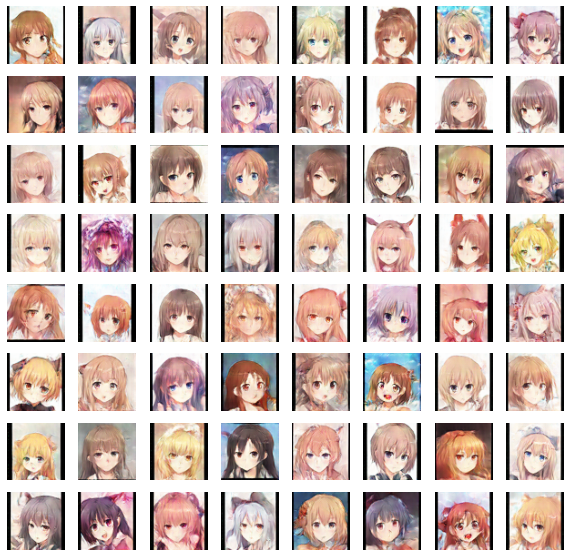

In [ ]:
import torch
from GANime.gan import GAN

#initialize new model with random weights
seed_size=128
new_gan_model = GAN(seed_size)
#load model trained for 100 epochs
new_gan_model.gen.load_state_dict(torch.load('GANime/example_models/gen.pt'))
new_gan_model.dis.load_state_dict(torch.load('GANime/example_models/dis.pt'))
#infer generation
generated_images = new_gan_model.generate(num_rows=8,
               num_cols=8,
               plot=True,
               device='cpu',
               return_noise=False
              )

# Checkpoint ท้ายบท

## คำถามชวนคิดเกี่ยวกับบทเรียน

1. คุณคิดว่าปัญหาที่คุณกำลังจะแก้ด้วย ML นั้นปริมาณและคุณภาพของข้อมูลที่ใช้เทรน (Data-Centric AI) หรือประสิทธิภาพของโมเดล (Model-Centric AI) สำคัญกว่ากัน เพราะอะไร

2. คุณคิดว่า open data และ open source มีข้อดี-ข้อเสียอย่างไรต่อ 1) ผู้สร้างผลงาน 2) ผู้นำผลงานไปใช้ 3) ชุมชน 4) สังคมโดยรวม

3. คุณคิดว่าการใช้ข้อมูลสาธารณะจากเว็บไซต์ต่างๆมาเทรนโมเดลมีข้อควรระวังอะไรบ้าง

4. การเทรนโมเดลด้วยข้อมูลที่สร้างขึ้นมาจากอีกโมเดลหนึ่ง ("ข้อมูลปลอม") นั้นมีข้อดี-ข้อเสียอย่างไรบ้าง

## สิ่งที่ควรเตรียมพร้อมสำหรับทำโครงงาน

### ☑️ ทบทวนระบบการให้คะแนนโครงงานให้เรียบร้อย

AI Builders จะออกใบประกาศนียบัตรจบการศึกษาให้กับผู้เข้าร่วมโครงการที่ส่งโครงงานได้คะแนนอย่างน้อย 70 จาก 100 คะแนนตามเกณฑ์ต่อไปนี้เท่านั้น

1. problem statement; เหตุผลในการแก้ปัญหาเชิงธุรกิจ/ชีวิตประจำวันด้วย machine learning - 15 คะแนน
2. metrics and baselines; การให้เหตุผลเชื่อมโยงการแก้ปัญหากับตัวชี้วัดที่เลือก / การวัดผลเทียบกับวิธีแก้ปัญหาในปัจจุบัน - 15 คะแนน

**วันนี้เราจะคิดถึง 2 ข้อนี้เป็นพิเศษ**

**3. data collection and cleaning; การเก็บและทำความสะอาดข้อมูล - 15 คะแนน**


**4. exploratory data analysis; การทำความเข้าใจข้อมูล - 20 คะแนน**


5. modeling, validation and error analysis; การทำโมเดล, ทดสอบโมเดล และวิเคราะห์ข้อผิดพลาดของโมเดล - 20 คะแนน
6. deployment; การนำโมเดลไปใช้แก้ปัญหาจริง - 15 คะแนน

### ☑️ หาข้อมูลมาจากไหนดี

จากแหล่งข้อมูลทั้งหมดที่กล่าวมาในบทเรียนนี้ คุณคิดว่าจะหาชุดข้อมูลจากไหนมาเทรนโมเดล

### ☑️ คุณภาพของข้อมูล Labels และ Inputs

ข้อมูลที่คุณได้มาจากอินเตอร์เน็ตไม่ว่าจะดาวน์โหลดชุดข้อมูลของคนอื่น, scrape เว็บไซต์, ใช้โมเดลคนอื่นสร้างขึ้นมา คุณต้องทำให้แน่ใจว่าคุณภาพมันพร้อมใช้งานทั้ง Labels และ Inputs เช่น ถ้าอยากทำโมเดลแปลภาษาไทย-จีนก็ต้องทำให้แน่ใจว่าคู่ประโยคที่เราหามามันแปลตรงกันจริงๆ เป็นต้น

### ☑️ Train-validation-test Splits สมเหตุสมผลไหม

ใช้สามัญสำนึกและตรรกะในการแบ่งข้อมูลเป็น train, validation, test sets ทำให้มั่นใจว่าไม่มีตัวอย่างเดียวกันหลุดไปใน set อื่น เช่น 

* ในการทำ face recognition ไม่ควรมีรูปคนๆเดียวกันในมากกว่า 1 set

* หากทำ time series forecasting เรียงข้อมูลจากเก่าสุดไปใหม่สุดใน `train`, `validation` และ `test` เพื่อไม่ให้โมเดลเห็นข้อมูลจากอนาคต

* หากทำ product recommendation ไม่ควรมีข้อมูลของลูกค้าคนเดียวกันในมากกว่า 1 set เพราะจะทำให้เราเดาว่าเขาเป็นลูกค้าประเภทไหนได้ด้วยข้อมูลที่ไม่ควรเห็น ฯลฯ 

ทั้งนี้ขึ้นอยู่กับวิจารณญาณของผู้สร้างโมเดล เรียนรู้เพิ่มเติมเกี่ยวกับการ split ข้อมูลได้จาก เรียนรู้เพิ่มเติมเกี่ยวกับ metric ได้จาก [DS&AI Academy](https://www.youtube.com/playlist?list=PL1kutgc5YvC841TmatsLuj4sDKkwj95Dz)